# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [2]:
%matplotlib inline
import sap2012
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
s=sap2012.Sap2012()

## Read input file

In [3]:
fp='input_csv_file_low_ins.csv'
s.read_input_csv(fp)

Here this is changed to the three possible options below:

In [4]:
s.inputs['window_u_value']

4.8

# list inputs to adjust values


In [5]:
index_name = ['temperature_during_heating_living_room']

# Generate list of input values for each variable

In [6]:
values = []
for i in range(len(index_name)):
    values.append(s.inputs[index_name[i]])
values
    


[21.0]

In [7]:
value_min = []
for i in range(len(index_name)):
    if (type(values[i])==list):
        calc_list_min = np.array(values[i])
        value_min.append(calc_list_min - 0.01 * calc_list_min)
    else:
        value_min.append(values[i] - 0.01 * values[i])

value_min

[20.79]

In [8]:
value_max = []
for i in range(len(index_name)):
    if (type(values[i])==list):
        calc_list_max = np.array(values[i])
        value_max.append(calc_list_max + 0.01 * calc_list_max)
    else:
        value_max.append(values[i] + 0.01 * values[i])

value_max

[21.21]

In [9]:
run = 1

In [10]:
#str (index_name[j]) + str(i+1)

# Rearrange values to 

In [11]:
inputs = []
for i in range(len(index_name)):
    inputs.append([value_min[i],value_max[i],values[i]])
inputs
    

[[20.79, 21.21, 21.0]]

In [12]:
runs = ['run_1', 'run_2', 'run_3']

In [13]:
input_dict = dict(zip(index_name,inputs))
input_dict

{'temperature_during_heating_living_room': [20.79, 21.21, 21.0]}

In [14]:
#'run%s' % str(i+1)

For each variable, the SAP model is run and the results stored in the `outputs` dictionary:

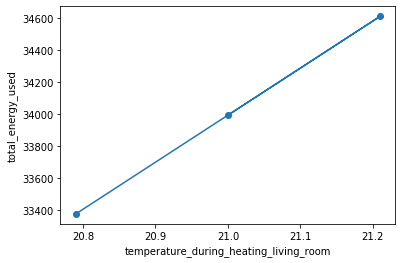

In [15]:
outputs={} 
index_name_SI = {}
total_energy_used_table = {}
for j in range(len(index_name)):
    for i,a in enumerate(input_dict[index_name[j]]):
        s.inputs[index_name[j]] = a
        s.run()
        outputs[runs[i]]=s.outputs.copy()# needs copy otherwise the same object is placed in all dictionary item
    total_energy_used = ([v['total_energy_used'] for v in outputs.values()])
    total_energy_used_table[index_name[j]]=(total_energy_used)
    fig, ax = plt.subplots()  
    ax.plot(input_dict[index_name[j]],total_energy_used,'-o')
    ax.set_xlabel(index_name[j])
    ax.set_ylabel('total_energy_used')
    output_table = pd.DataFrame(outputs)
    diff_y = ((output_table.run_2['total_energy_used'] - output_table.run_1['total_energy_used'])/output_table.run_3['total_energy_used'])
    diff_x = 0.02
    index_name_SI[str (index_name[j])] = diff_y/diff_x
energy = pd.DataFrame(total_energy_used_table, index = runs) 
#SI = pd.DataFrame(index_name_SI)

Plot results

In [16]:

energy

,temperature_during_heating_living_room
run_1,33373.764952
run_2,34609.366016
run_3,33991.292759


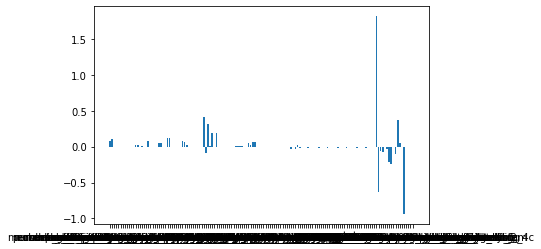

In [121]:
plt.bar(*zip(*index_name_SI.items()))
plt.show()

In [122]:
SI 

,area,average_storey_height,number_of_chimneys_main_heating,number_of_chimneys_secondary_heating,number_of_chimneys_other,number_of_open_flues_main_heating,number_of_open_flues_secondary_heating,number_of_open_flues_other,number_of_intermittant_fans_total,number_of_passive_vents_total,...,hours_heating_is_off_1_weekend_rest_of_dwelling,hours_heating_is_off_2_weekend_rest_of_dwelling,responsiveness_of_heating_system,living_room_area,temperature_adjustment_table_4e,efficiency_of_main_space_heating_system_1,efficiency_of_main_space_heating_system_2,efficiency_of_secondary_space_heating_system,efficiency_of_water_heater,efficiency_of_water_heater_adjustment_table_4c
0,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
1,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
2,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
3,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
4,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
138,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
139,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0
140,0.0792,0.100312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.094785,0.372883,0.049083,0.0,-0.93472,0.0,0.0,-0.007282,0.0


In [123]:
total_energy_used=[v['total_energy_used'] for v in outputs.values()]
total_energy_used

[33991.292759284224, 33991.292759284224, 33991.292759284224]

In [124]:
total_CO2_emissions_yearlys=[v['total_CO2_emissions_yearly'] for v in outputs.values()]
total_CO2_emissions_yearlys

[7371.883975118943, 7371.883975118943, 7371.883975118943]

In [17]:
outputs

{'run_1': {'volume': [0, 114.88499999999999, 112.67699999999999],
  'total_floor_area': 98.94,
  'dwelling_volume': 227.56199999999998,
  'number_of_chimneys_total': 0.0,
  'number_of_chimneys_m3_per_hour': 0.0,
  'number_of_open_flues_total': 0.0,
  'number_of_open_flues_m3_per_hour': 0.0,
  'number_of_intermittant_fans_m3_per_hour': 0.0,
  'number_of_passive_vents_m3_per_hour': 0.0,
  'number_of_flueless_gas_fires_m3_per_hour': 0.0,
  'infiltration_due_to_chimneys_flues_fans_PSVs': 0.0,
  'additional_infiltration': 0.1,
  'window_infiltration': 0.25,
  'infiltration_rate': 0.6499999999999999,
  'infiltration_rate2': 0.6499999999999999,
  'shelter_factor': 1.0,
  'infiltration_rate_incorporating_shelter_factor': 0.6499999999999999,
  'wind_factor': [1.275,
   1.25,
   1.225,
   1.1,
   1.075,
   0.95,
   0.95,
   0.925,
   1.0,
   1.075,
   1.125,
   1.175],
  'adjusted_infiltration_rate_allowing_for_shelter_and_wind_speed': [0.8287499999999999,
   0.8124999999999999,
   0.79624999999

In [52]:
output = pd.DataFrame(outputs)
output

,run_1,run_2,run_3
volume,"[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]","[0, 114.88499999999999, 112.67699999999999]"
total_floor_area,98.94,98.94,98.94
dwelling_volume,227.562,227.562,227.562
number_of_chimneys_total,0,0,0
number_of_chimneys_m3_per_hour,0,0,0
...,...,...,...
energy_saving_generation_technologies_total_emissions,0,0,0
total_CO2_emissions_yearly,6891.18,6891.18,6891.18
dwelling_CO2_emission_rate,69.6501,69.6501,69.6501
CF,47.8754,47.8754,47.8754


In [56]:
index_name_SI

{'area': 0.07920019705530969,
 'average_storey_height': 0.10031152602027467,
 'number_of_chimneys_main_heating': 0.0,
 'number_of_chimneys_secondary_heating': 0.0,
 'number_of_chimneys_other': 0.0,
 'number_of_open_flues_main_heating': 0.0,
 'number_of_open_flues_secondary_heating': 0.0,
 'number_of_open_flues_other': 0.0,
 'number_of_intermittant_fans_total': 0.0,
 'number_of_passive_vents_total': 0.0,
 'number_of_flueless_gas_fires_total': 0.0,
 'air_permeability_value_q50': 0.0,
 'number_of_storeys_in_the_dwelling': 0.02288044644562581,
 'structural_infiltration': 0.028600559985892254,
 'suspended_wooden_ground_floor_infiltration': 0.0,
 'no_draft_lobby_infiltration': 0.0057201109684645755,
 'percentage_of_windows_and_doors_draught_proofed': 0.0,
 'number_of_sides_on_which_dwelling_is_sheltered': 0.0,
 'monthly_average_wind_speed': 0.07436153620313496,
 'mechanical_ventilation_air_change_rate_through_system': 0.0,
 'exhaust_air_heat_pump_using_Appendix_N': 0.0,
 'mechanical_ventilat

In [126]:
writer = pd.ExcelWriter('low_ins.xlsx',engine = 'xlsxwriter')

In [127]:
energy.to_excel(writer,sheet_name = 'OAT')

In [128]:
writer.save()